In [1]:
import pandas as pd 
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from IPython.display import Image
import os

In [2]:
df=pd.read_csv(r'D:/datascience_covid_professorRaja/COVID_AU_national_daily_change.csv')

In [20]:
#Preprocessing
df['date']=pd.to_datetime(df['date'])
#first method estimating the transmission rate for covid epidemic:
def beta_1(T, In, I,S,N):
    try:        
        beta=(-log(1-(In/I)))/(T*S/N)
    except ValueError:
        beta=0
    return beta

def beta_2(T, In, I,S):
    try:
        beta=(-log(1-In*((1/I)+(1/S))))/T
    except ValueError:
        beta=0
    return beta
N=25e6  #population of AUSSIE - Reviewed soon
new=df['confirmed']
new=new[:60] #In from here
cul=df['c_confirmed']
cul=cul[:60] #I from here
T=len(cul)
recs=df['recovered']
recs=recs[:60]
death=df['deaths']
death=death[:60]
R = recs+death
#S=N-I
beta1=[]
beta2=[]
Ss=[]
for I in cul: 
    S=N-I
    Ss.append(S)
for In, I, S in zip(new,cul,Ss):
    a=beta_1(T, In, I,S,N)*100
    beta1.append(a)

for In, I, S in zip(new,cul,Ss):
    b=beta_2(T,In,I,S)*100
    beta2.append(b)

## 1. Estimation of Parameters for Kendrick ODE's Model - SIR

#### a. Simple estimation using statiscal inferences: (first method in my paper)

the value of β=-47526.8| γ=47527.7 |R0=-0.999982


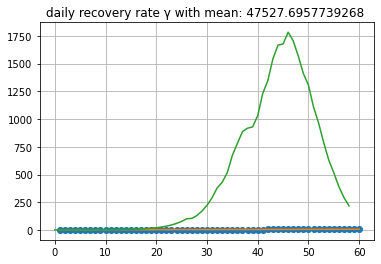

In [103]:
plt.figure()
plt.grid(1)
y=np.log(cul)
t=np.linspace(1,60,60)
m, b = np.polyfit(t,y,1)
plt.plot(t,(y),'o')
plt.plot(t,(m*t+b))
plt.title('m estimate: %s' %(m*10))
R=np.array(R)
gammas=[]
for i in range(0,59):
    gamma=(R[i+1]-R[i])/cul[i]
    gammas.append(gamma)
a=[]
for i in range(0,59): 
    if gammas[i]!=0:
        a.append(gammas[i]) 

γ = np.mean(a)*100
plt.title('daily recovery rate γ with mean: %s ' %γ)
plt.grid(1)
plt.plot(gammas)
print('the value of β=%g| γ=%g |R0=%g'%(m*10-γ,γ, (m*10-γ)/γ))

#### Let's plot it

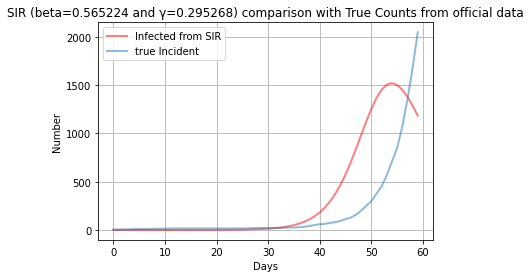

In [102]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N=11e6
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = cul[0],R[0]
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = m*10-γ, γ
# A grid of time points (in days)
t = np.linspace(0, 59, 60)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
plt.plot(I/1000, 'r', alpha=0.5, lw=2, label='Infected from SIR')
plt.plot(cul, alpha=0.5, lw=2, label= "true Incident")
plt.xlabel('Days')
plt.ylabel('Number')
plt.grid(1)
legend = plt.legend()
plt.title("SIR (beta=%g and γ=%g) comparison with True Counts from official data" % (m*10-γ,γ))
plt.show()

In [92]:
####b. 

0        4
1        4
2        5
3        5
4        9
5        9
6        9
7       10
8       12
9       12
10      13
11      14
12      15
13      15
14      15
15      15
16      15
17      15
18      15
19      15
20      15
21      15
22      15
23      15
24      15
25      15
26      15
27      19
28      20
29      20
30      20
31      20
32      20
33      23
34      25
35      25
36      28
37      32
38      40
39      51
40      59
41      63
42      73
43      80
44      92
45     112
46     127
47     157
48     198
49     249
50     297
51     376
52     454
53     567
54     709
55     847
56    1072
57    1352
58    1680
59    2050
Name: c_confirmed, dtype: int64

In [87]:
3.42029203e+06

3420292.03

In [108]:
import scipy.integrate as integrate
import scipy.special as special

### 2. Incidence Formulation

<img src="graphs/incidentrate.png">

In [144]:

D=0.76
C=10.147333333333336
x=[]
q=[]
z=[]
for t in range(0,59):
    if t>3:
        a= D*C*new[t-4]*0.7
        z.append(a)
    else:
        a=0
        z.append(a)
for t in range(0,59):
    if t>4:
        a= D*C*new[t-5]*0.7
        q.append(a)
    else:
        a=0
        q.append(a)
for t in range(0,59):
    if t>5:
        a= D*C*new[t-6]*0.7
        x.append(a)
    else:
        a=0
        x.append(a)


        
    

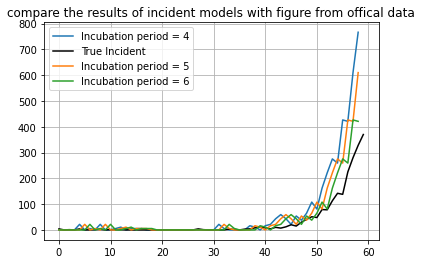

In [148]:
plt.plot(z, label='Incubation period = 4')
plt.plot(new, label='True Incident', color='black')
plt.plot(q, label='Incubation period = 5')
plt.plot(x, label='Incubation period = 6')
plt.title('compare the results of incident models with figure from offical data')
plt.legend()
plt.grid(1)